In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv("../input/amex-default-prediction/train_data.csv", nrows=200)

In [4]:
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744...,2018-01-03,0.899468,0.210492,0.023006,1.002391,0.008684,0.105592,0.004492,0.582447,...,NaN,NaN,NaN,0.009805,0.006723,0.006261,NaN,0.002071,0.008596,0.009263
196,000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744...,2018-02-02,0.894790,0.212468,0.163463,0.592315,0.009281,0.105845,0.005987,0.390202,...,NaN,NaN,NaN,0.002574,0.005105,0.001351,NaN,0.008515,0.006459,0.008376
197,000201146e53cacdde1c7e9d29f4d3c46fd4d9231a3744...,2018-03-01,0.955898,0.182730,0.171452,0.047638,0.001715,0.108122,0.009618,0.454871,...,NaN,NaN,NaN,0.004413,0.004494,0.002725,NaN,0.000022,0.002604,0.008785
198,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,2017-03-19,1.007809,0.002568,0.017698,0.816354,0.000443,0.345746,0.002354,0.007117,...,NaN,NaN,NaN,0.006032,0.009890,0.001779,NaN,0.005518,0.003225,0.002189


<AxesSubplot:xlabel='D_39'>

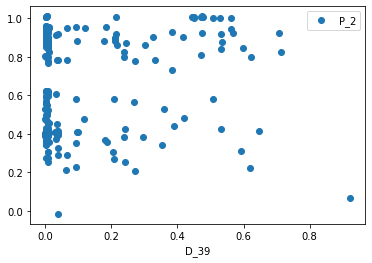

In [5]:
#Two numerical columns
df.plot(x='D_39', y='P_2', style='o')

<AxesSubplot:xlabel='customer_ID'>

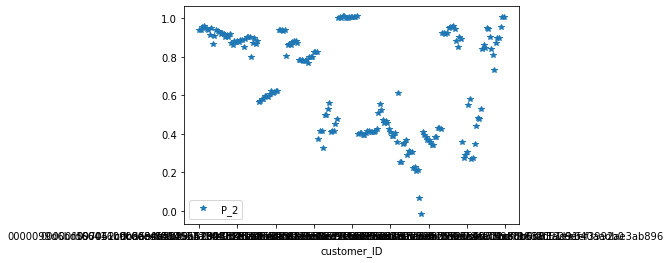

In [6]:
#One numerical and one categorical
df.plot(x='customer_ID', y='P_2',style='*')

<AxesSubplot:xlabel='S_2'>

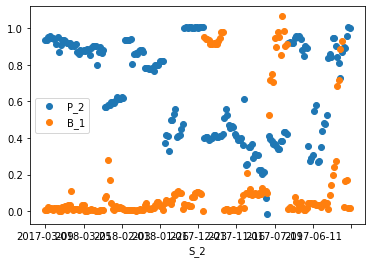

In [7]:
#Two numerical and one categorical
df.plot(x="S_2", y=["P_2", "B_1"],style='o')

In [8]:
#Check null values in a column.
df['D_39'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: D_39, Length: 200, dtype: bool

In [9]:
#Check the cardinality of a categorical column.
df['D_63'].nunique()

3

Titanic Disaster

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib as plt

In [11]:
df=pd.read_csv("../input/titanic/train.csv")

In [12]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='PassengerId'>

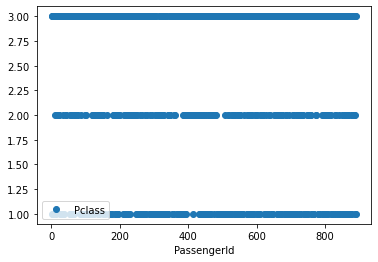

In [13]:
df.plot(x='PassengerId', y='Pclass',style="o")


<AxesSubplot:xlabel='Name'>

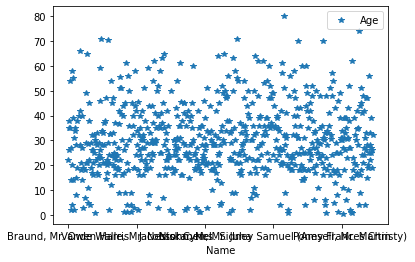

In [14]:
df.plot(x='Name', y='Age', style='*')


<AxesSubplot:xlabel='Sex'>

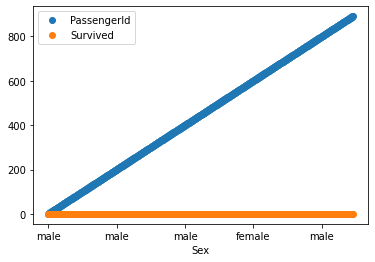

In [15]:
df.plot(x="Sex", y=["PassengerId", "Survived"],style='o')


In [16]:
df['Cabin'].isnull()


0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [17]:
df['Pclass'].nunique()


3